# DBScan in 1D

Based off of [cluster-plot-dbscan-py](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
# #############################################################################
%matplotlib inline
import matplotlib.pyplot as plt

## Make the artificial data: 1D1T

**note** "T" here means just the index; later, it could be considered "time"

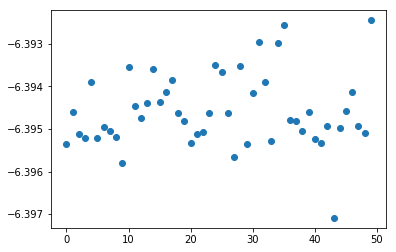

In [4]:
X, labels_true = make_blobs(n_samples=50, 
                            n_features=1, 
                            centers=1, 
                            cluster_std=0.001,
                            random_state=11)

plt.plot(X,'o')

In [15]:
labels_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## Regularize the data

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.

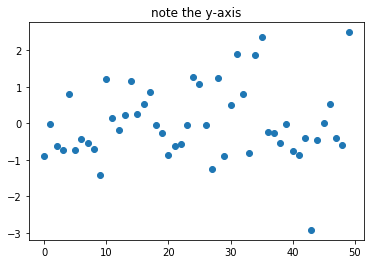

In [5]:
X = StandardScaler().fit_transform(X)

plt.plot(X,'o')
plt.title("note the y-axis");

## DBScan

### Parameters

The basic algorithmic usage
```
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
```

* `eps` : `float`, default=0.5
    * The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. 
    * This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

* `min_samples` : `int`, default=5
    * The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.


The main returns
```
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
```

## Plot the findings

Check fo a few $\epsilon$s where the cluster is the best

In [6]:
indices = np.arange(0,50,1)

In [18]:
import pandas as pd

0.1
For 0.100000 number of clusters: 0
Estimated number of noise points: 50



0.15000000000000002
For 0.150000 number of clusters: 1
Estimated number of noise points: 31
Silhouette Coefficient: 0.320



0.2
For 0.200000 number of clusters: 2
Estimated number of noise points: 20
Silhouette Coefficient: 0.290



0.25
For 0.250000 number of clusters: 1
Estimated number of noise points: 18
Silhouette Coefficient: 0.516



0.3
For 0.300000 number of clusters: 1
Estimated number of noise points: 15
Silhouette Coefficient: 0.520



0.35000000000000003
For 0.350000 number of clusters: 1
Estimated number of noise points: 15
Silhouette Coefficient: 0.520



0.4
For 0.400000 number of clusters: 2
Estimated number of noise points: 7
Silhouette Coefficient: 0.444



0.45
For 0.450000 number of clusters: 2
Estimated number of noise points: 6
Silhouette Coefficient: 0.480



0.5
For 0.500000 number of clusters: 1
Estimated number of noise points: 6
Silhouette Coefficient: 0.548





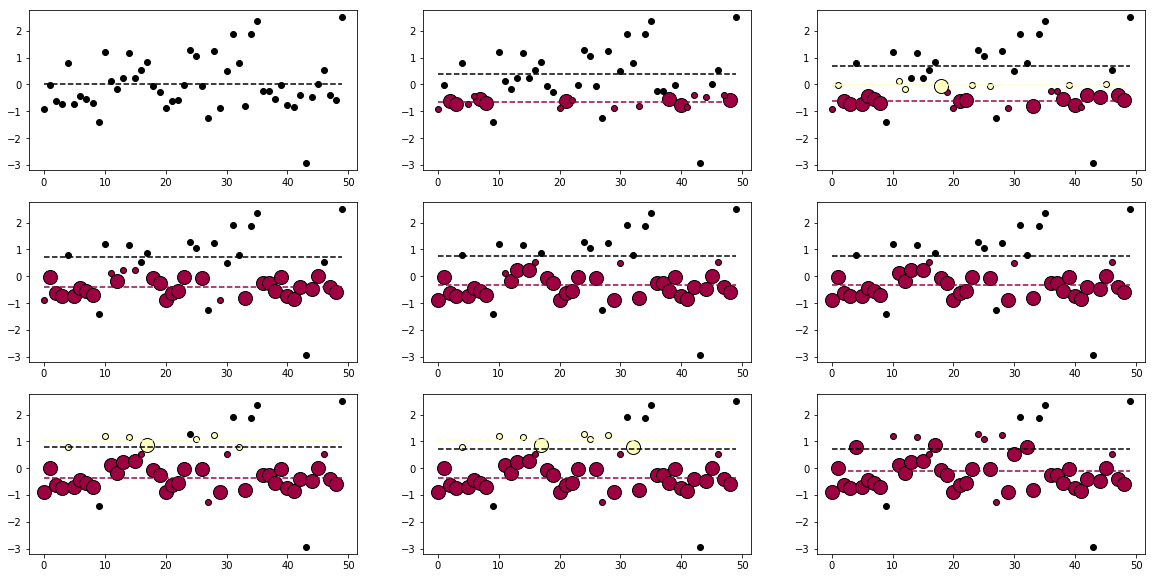

In [55]:
fig, ax = plt.subplots(3,3, figsize=[20,10])
ax = ax.reshape(9,)
pdf = pd.DataFrame()
for n, eps in enumerate(np.arange(0.05,0.55,0.05)):
    
    if n==0: continue
    
    n = n-1
    
    print(eps)
    
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print('For %f number of clusters: %d' % (eps, n_clusters_))
    print('Estimated number of noise points: %d' % n_noise_)
    
    # If there is a reference data set
    '''
    print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.6f"
          % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.6f"
          % metrics.adjusted_mutual_info_score(labels_true, labels))
    '''
    # 
    sil_sco = -1
    if np.unique(labels).size>1:
        sil_sco = metrics.silhouette_score(X, labels)
        print("Silhouette Coefficient: %0.3f"
              % sil_sco)    
    '''
    dc = {'eps':eps, 'n_clusters':n_clusters_, 'n_noise':n_noise_, 'sil_sco':sil_sco}
    pdf_row = pd.DataFrame().from_dict(data=dc, orient='index').transpose()

    pdf = pd.concat([pdf,pdf_row]).reset_index(drop=True) 
    '''
    
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        x = indices[class_member_mask & core_samples_mask]
        y = X[class_member_mask & core_samples_mask]    
        
        #print("for",k,"size is",xy.shape)

        ax[n].plot(x,y, 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14, label='{}, big'.format(k))
        
        x = indices[class_member_mask & ~core_samples_mask]
        y = X[class_member_mask & ~core_samples_mask]    
        #print("for",k,"size is",xy.shape)    

        ax[n].plot(x,y, 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6, label='{}, small'.format(k))
        
        y_mean = X[class_member_mask].mean()
        ax[n].plot([indices[0],indices[-1]],[y_mean, y_mean], '--', color=tuple(col), label='mean')    

    #ax[n].title('Estimated number of clusters: %d' % n_clusters_)
    #ax[n].legend()   
    print('\n\n')

In [122]:
pdf = pd.DataFrame()
for n, eps in enumerate(np.arange(0.01,1.01,0.01)):
    
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
     
    sil_sco = -1
    if np.unique(labels).size>1:
        sil_sco = metrics.silhouette_score(X, labels)

    dc = {'eps':eps, 'n_clusters':n_clusters_, 'n_noise':n_noise_, 'sil_sco':sil_sco}
    pdf_row = pd.DataFrame().from_dict(data=dc, orient='index').transpose()

    pdf = pd.concat([pdf,pdf_row]).reset_index(drop=True) 

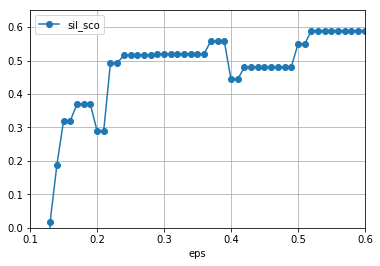

In [123]:
pdf[['eps', 'sil_sco']].plot(x='eps', y='sil_sco', marker='o')
plt.xlim(0.1,0.6)
plt.ylim(0,0.65)
plt.grid()

In [124]:
new_X = np.array([[n] for n in pdf[(pdf['eps']>0.09) & (pdf['eps']<0.6)]['sil_sco'].values])

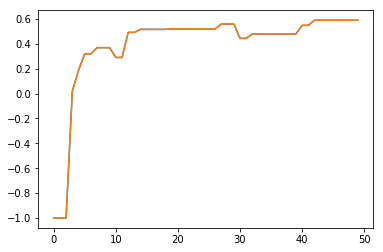

In [125]:
amplitude = 0.0
plt.plot(new_X)
plt.plot(X*amplitude + new_X)

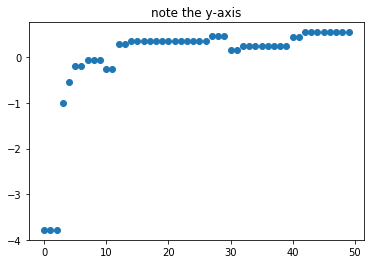

In [126]:
new_X = X*amplitude + new_X
new_X = StandardScaler().fit_transform(new_X)

plt.plot(new_X,'o')
plt.title("note the y-axis");

0.01
For 0.010000 number of clusters: 0
Estimated number of noise points: 50



0.02
For 0.020000 number of clusters: 1
Estimated number of noise points: 37
Silhouette Coefficient: -0.173



0.03
For 0.030000 number of clusters: 1
Estimated number of noise points: 37
Silhouette Coefficient: -0.173



0.04
For 0.040000 number of clusters: 2
Estimated number of noise points: 27
Silhouette Coefficient: 0.098



0.05
For 0.050000 number of clusters: 2
Estimated number of noise points: 27
Silhouette Coefficient: 0.098



0.060000000000000005
For 0.060000 number of clusters: 2
Estimated number of noise points: 27
Silhouette Coefficient: 0.098



0.06999999999999999
For 0.070000 number of clusters: 1
Estimated number of noise points: 27
Silhouette Coefficient: 0.135



0.08
For 0.080000 number of clusters: 1
Estimated number of noise points: 22
Silhouette Coefficient: 0.291



0.09
For 0.090000 number of clusters: 1
Estimated number of noise points: 14
Silhouette Coefficient: 0.570



0.09999

IndexError: index 9 is out of bounds for axis 0 with size 9

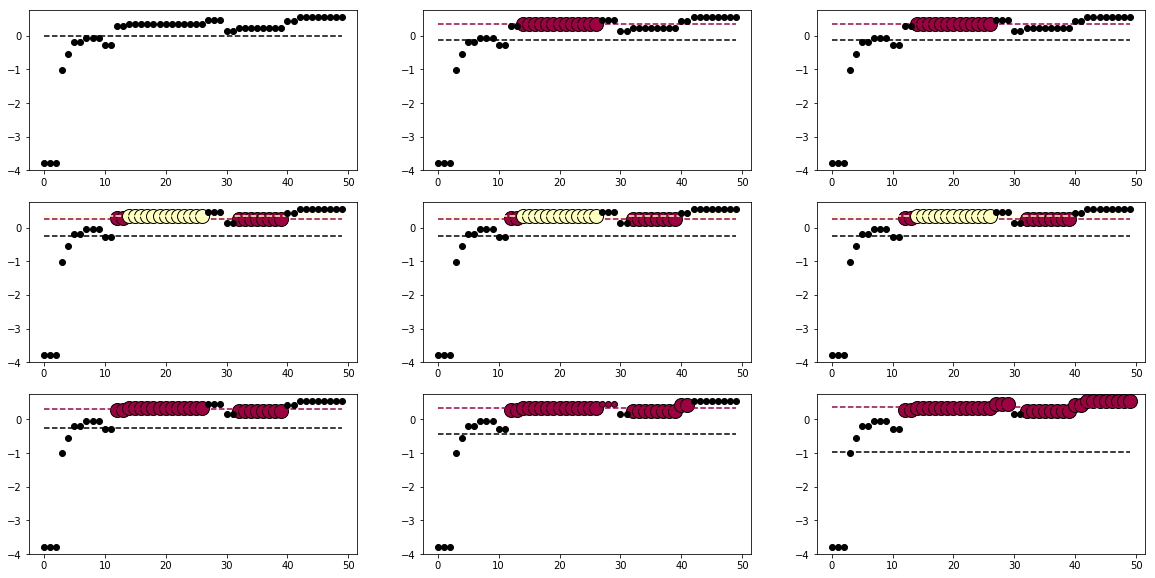

In [127]:
fig, ax = plt.subplots(3,3, figsize=[20,10])
ax = ax.reshape(9,)
pdf = pd.DataFrame()
for n, eps in enumerate(np.arange(0.01,0.11,0.01)):
    '''
    if n==0: continue
    else:
        n = n-1
    '''
    print(eps)
    
    db = DBSCAN(eps=eps, min_samples=10).fit(new_X)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print('For %f number of clusters: %d' % (eps, n_clusters_))
    print('Estimated number of noise points: %d' % n_noise_)
    
    # If there is a reference data set
    '''
    print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.6f"
          % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.6f"
          % metrics.adjusted_mutual_info_score(labels_true, labels))
    '''
    # 
    sil_sco = -1
    if np.unique(labels).size>1:
        sil_sco = metrics.silhouette_score(new_X, labels)
        print("Silhouette Coefficient: %0.3f"
              % sil_sco)    
    '''
    dc = {'eps':eps, 'n_clusters':n_clusters_, 'n_noise':n_noise_, 'sil_sco':sil_sco}
    pdf_row = pd.DataFrame().from_dict(data=dc, orient='index').transpose()

    pdf = pd.concat([pdf,pdf_row]).reset_index(drop=True) 
    '''
    
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        x = indices[class_member_mask & core_samples_mask]
        y = new_X[class_member_mask & core_samples_mask]    
        
        #print("for",k,"size is",xy.shape)

        ax[n].plot(x,y, 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14, label='{}, big'.format(k))
        
        x = indices[class_member_mask & ~core_samples_mask]
        y = new_X[class_member_mask & ~core_samples_mask]    
        #print("for",k,"size is",xy.shape)    

        ax[n].plot(x,y, 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6, label='{}, small'.format(k))
        
        y_mean = new_X[class_member_mask].mean()
        ax[n].plot([indices[0],indices[-1]],[y_mean, y_mean], '--', color=tuple(col), label='mean')    

    #ax[n].title('Estimated number of clusters: %d' % n_clusters_)
    #ax[n].legend()   
    print('\n\n')

# Sythetic data, part II: slightly more realistic

In [598]:
import importlib
import synthetic_data

In [660]:
xxx = np.arange(0,100,0.1)

In [716]:
dc = {
        "bump1_amp":  0.5, "bump1_slope": 0.5, "bump1_start": 20 , "bump1_end": 60,\
        "bump2_amp": -1.0, "bump2_slope": 0.75, "bump2_start": 60 , "bump2_end": 80,\
        "bump3_amp": -1.5, "bump3_slope": 0.95, "bump3_start": 80 , "bump3_end": 90  
     }

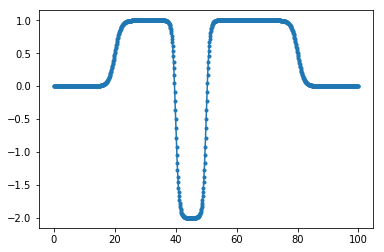

In [812]:
importlib.reload(synthetic_data);

from synthetic_data import get_1bump, get_bumps

plt.plot(xxx, get_bumps(xxx, **dc), '.-')

In [808]:
dc = {
        "bump1_amp":  0.5, "bump1_slope": 0.5, "bump1_start": 20 , "bump1_end": 80, "bump1_eta": 0.0015,
        "bump2_amp": -1.5, "bump2_slope": 0.95, "bump2_start": 40 , "bump2_end": 50, "bump2_eta": 0.125    
}

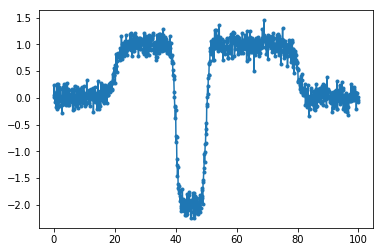

In [809]:
importlib.reload(synthetic_data);

from synthetic_data import get_noisy_bumps

plt.plot(xxx, get_noisy_bumps(xxx, **dc), '.-')

In [796]:
def get_noise_event(y):
    
    act0=0.050
    act1=0.025
    act2=0.085
    trp0=0.035
    trp1=0.030
    trp2=0.080

    if abs(y) < 0.1:
        eta = np.random.normal(loc=0.0, scale=act0, size=1)
        
    elif (y >= 0.91) & (y < 1.01):
        eta = np.random.normal(loc=0.0, scale=act1, size=1)   
    
    elif (y >= -2.01) & (y < -1.81):
        eta = np.random.normal(loc=0.0, scale=act2, size=1)
        
    else:
        eta = np.random.normal(loc=0.0, scale=trp2, size=1)
    
    return y + eta

def get_noise(yyy):
    for n,yy in enumerate(yyy):
        #print(n)
        yyy[n] = get_noise_event(yy)

    return yyy    

In [813]:
dc = {
        "bump1_amp":  0.5, "bump1_slope": 0.5, "bump1_start": 20 , "bump1_end": 80,
        "bump2_amp": -1.5, "bump2_slope": 0.95, "bump2_start": 40 , "bump2_end": 50
     }

dcn = {
        "bump1_amp":  0.5, "bump1_slope": 0.5, "bump1_start": 20 , "bump1_end": 80, "bump1_eta": 0.015,
        "bump2_amp": -1.5, "bump2_slope": 0.95, "bump2_start": 40 , "bump2_end": 50, "bump2_eta": 0.025    
     }


In [814]:
yyy = get_bumps(xxx, **dc)
yyyn = get_noisy_bumps(xxx, **dcn)

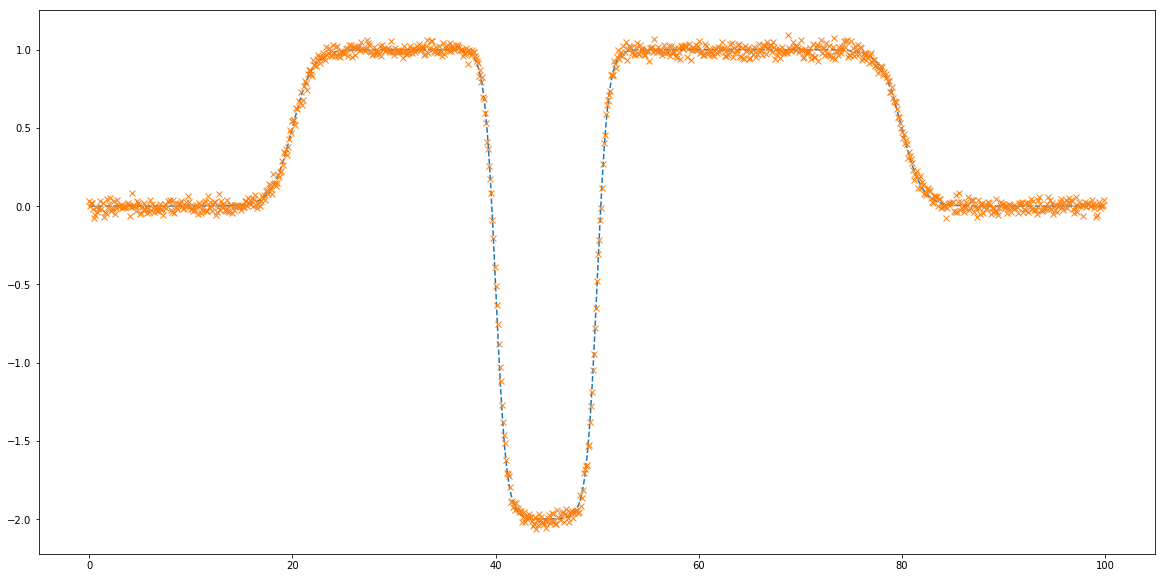

In [815]:
plt.figure(figsize=(20,10))
plt.plot(xxx, yyy, '--')
plt.plot(xxx, yyyn, 'x')

In [816]:
import numpy.ma as ma

In [817]:
mask = np.random.randint(0, high=2, size=xxx.size) * \
       np.random.randint(0, high=3, size=xxx.size)%2

In [818]:
remask = lambda x: int(not bool(x))

In [819]:
remask = lambda x: int(not bool(x))
mask = np.array(list(map(remask, mask)))

In [820]:
new_mask = ma.nonzero(ma.array(xxx, mask=mask))

In [821]:
xxxx = xxx[new_mask]
print(xxx.size, xxxx.size)

1000 144


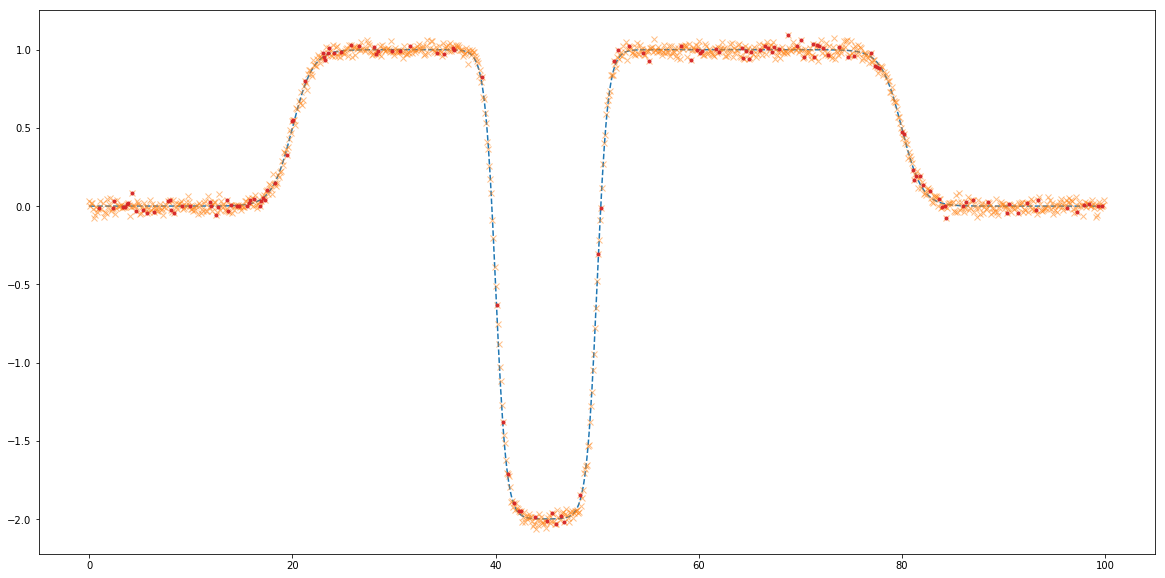

In [823]:
plt.figure(figsize=(20,10))
plt.plot(xxx, yyy, '--')
'''plt.plot(xxx, get_noise(fff(xxx)), 'x', alpha=0.5, )
plt.plot(xxxx, get_noise(fff(xxxx)), '.', alpha=0.95, color="C3")'''

plt.plot(xxx, yyyn, 'x', alpha=0.5, )
plt.plot(xxxx, yyyn[new_mask], '.', alpha=0.95, color="C3")

In [824]:
yyyy = yyyn[new_mask]

In [910]:
#new_X = np.array([[n] for n in get_noise(fff(xxxx))])
yyyy_ = yyyy.reshape(yyyy.size,1) #np.array([[n] for n in yyyy])
xxxx_ = xxxx.reshape(xxxx.size,1) #np.array([[n] for n in xxxx])

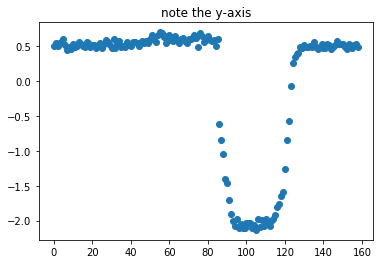

In [588]:
new_X = StandardScaler().fit_transform(new_X)

plt.plot(new_X,'o')
plt.title("note the y-axis");

For 0.010000, nr. clusters: 3, nr noise points: 37, Silhouette Coefficient: 0.451
For 0.020000, nr. clusters: 2, nr noise points: 35, Silhouette Coefficient: 0.617
For 0.030000, nr. clusters: 3, nr noise points: 29, Silhouette Coefficient: 0.613
For 0.040000, nr. clusters: 4, nr noise points: 14, Silhouette Coefficient: 0.690
For 0.050000, nr. clusters: 3, nr noise points: 13, Silhouette Coefficient: 0.796
For 0.060000, nr. clusters: 3, nr noise points: 12, Silhouette Coefficient: 0.809
For 0.070000, nr. clusters: 3, nr noise points: 10, Silhouette Coefficient: 0.830
For 0.080000, nr. clusters: 3, nr noise points: 9, Silhouette Coefficient: 0.839
For 0.090000, nr. clusters: 3, nr noise points: 9, Silhouette Coefficient: 0.839
For 0.100000, nr. clusters: 3, nr noise points: 8, Silhouette Coefficient: 0.846


IndexError: index 9 is out of bounds for axis 0 with size 9

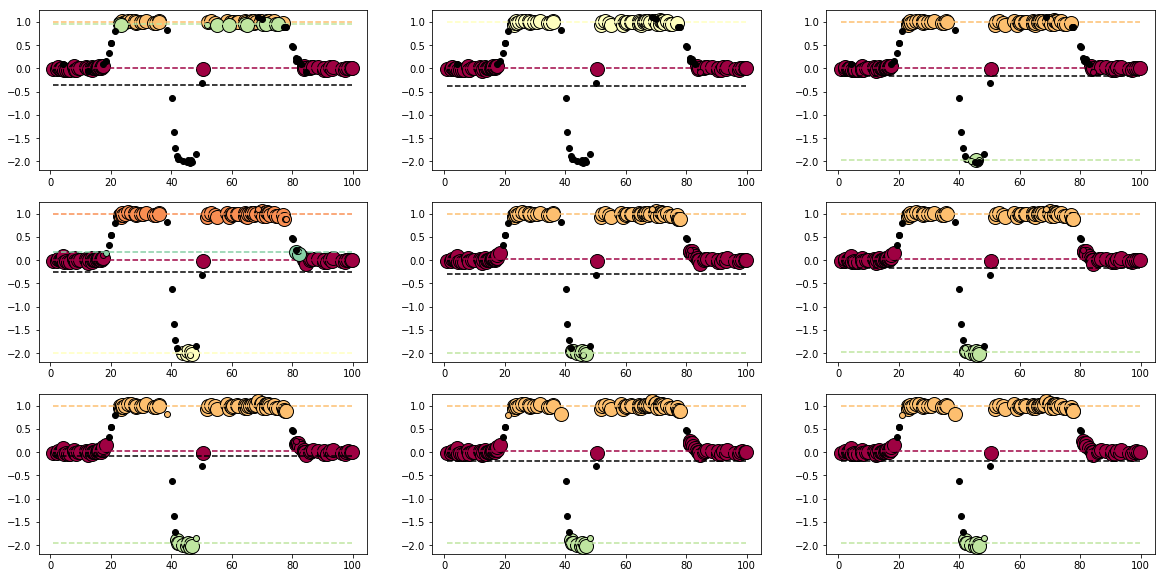

In [911]:
fig, ax = plt.subplots(3,3, figsize=[20,10])
ax = ax.reshape(9,)

for n, eps in enumerate(np.arange(0.01,0.11,0.01)):
    '''
    if n==0: continue
    else:
        n = n-1
    '''
    
    db = DBSCAN(eps=eps, min_samples=5).fit(yyyy_)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    metric_str = 'For %f, nr. clusters: %d, nr noise points: %d' % (eps, n_clusters_, n_noise_)
    
    sil_sco = -1
    if np.unique(labels).size>1:
        sil_sco = metrics.silhouette_score(new_X, labels)
        add_str = ", Silhouette Coefficient: %0.3f" % sil_sco
    else:
        add_str=''
    
    print(metric_str + add_str)
    
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        x = xxxx_[class_member_mask & core_samples_mask]
        y = yyyy_[class_member_mask & core_samples_mask]    
        
        #print("for",k,"size is",xy.shape)

        ax[n].plot(x,y, 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14, label='{}, big'.format(k))
        
        x = new_xxxx[class_member_mask & ~core_samples_mask]
        y = new_X[class_member_mask & ~core_samples_mask]    
        #print("for",k,"size is",xy.shape)    

        ax[n].plot(x,y, 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6, label='{}, small'.format(k))
        
        y_mean = new_X[class_member_mask].mean()
        ax[n].plot([new_xxxx[0],new_xxxx[-1]],[y_mean, y_mean], '--', color=tuple(col), label='mean')    


In [831]:
tdiff = lambda x : np.concatenate([np.array([0.0]), x[1:]-x[:-1]])

In [919]:
time_thresh = 5.0
eps=0.05
min_samples = 5


db = DBSCAN(eps=eps, min_samples=min_samples).fit(yyyy_)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

metric_str = 'For %f, nr. clusters: %d, nr noise points: %d' % (eps, n_clusters_, n_noise_)

sil_sco = -1
if np.unique(labels).size>1:
    sil_sco = metrics.silhouette_score(yyyy_, labels)
    add_str = ", Silhouette Coefficient: %0.3f" % sil_sco
else:
    add_str=''

print(metric_str + add_str)

# Black removed and is used for noise instead.
unique_labels = set(labels)

print('Old labels:', set(labels))

# Create a updated label for each new cluster
new_label = max(list(labels))+1

for k in unique_labels:
    
    if (k!=-1):     
    
        class_member_mask = (labels == k)
        x = xxxx_[class_member_mask]

        # Check if there are time breaks; 
        # if so, relabel the event with new class labels
        td = tdiff(x.reshape(x.size))
        td_breaks = (td > time_thresh)
    
    
        if np.any(td_breaks) & (k!=-1):       

            # Get a subset of labels 
            sublabels = labels[class_member_mask]         

            # Measure the durations between all events; look for the large gaps
            new_td_breaks = ma.nonzero(td_breaks)[0]
            print(f"time breaks: for k={k}, there are {new_td_breaks.size} break(s)")

            # for each break, get the ranges for the new labels
            lowerbound = 0
            for m in new_td_breaks:

                #print(f"for {m,lowerbound}:", x[m-1],x[lowerbound],x[m-1]-x[lowerbound])            

                if x[m-1]-x[lowerbound] <= 2.0:
                    sublabels[lowerbound:m]=-1
                else:
                    sublabels[lowerbound:m]=new_label

                lowerbound = m
                new_label += 1

            # Update the labels    
            labels[class_member_mask] = sublabels
        else:
            print('pass on ',k)
    else:
        print('do nothing for k =',k)
    
print('New labels',set(labels))

For 0.050000, nr. clusters: 3, nr noise points: 13, Silhouette Coefficient: 0.796
Old labels: {0, 1, 2, -1}
time breaks: for k=0, there are 2 break(s)
time breaks: for k=1, there are 1 break(s)
pass on  2
do nothing for k = -1
New labels {0, 1, 2, 3, 5, -1}


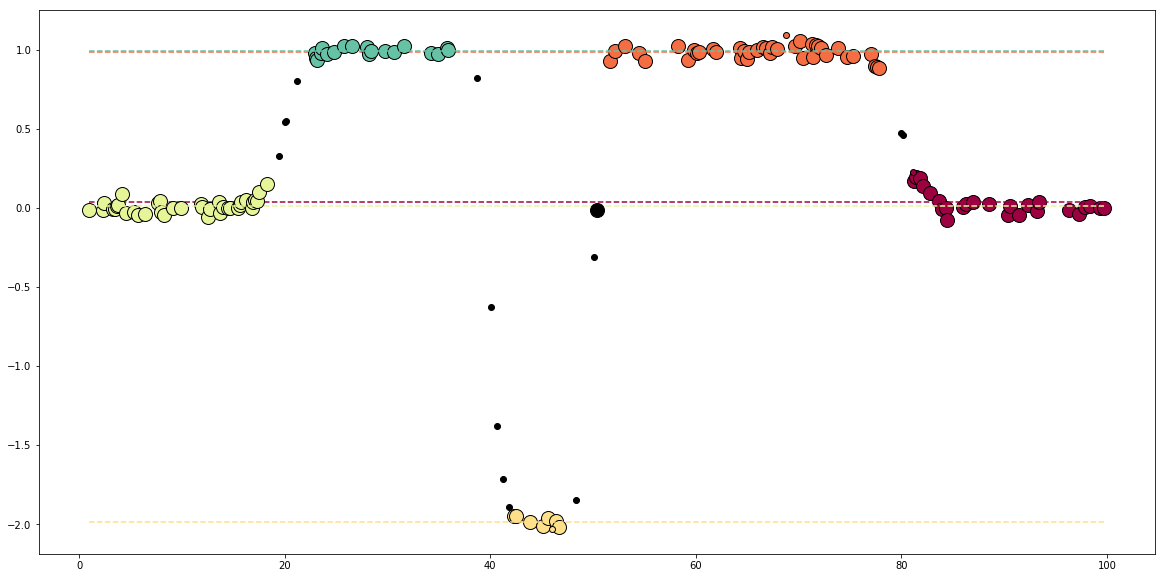

In [920]:
fig, ax = plt.subplots(1,1, figsize=[20,10])

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    x = new_xxxx[class_member_mask & core_samples_mask]
    y = new_X[class_member_mask & core_samples_mask]    

    #print("for",k,"size is",xy.shape)

    ax.plot(x,y, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14, label='{}, big'.format(k))

    x = new_xxxx[class_member_mask & ~core_samples_mask]
    y = new_X[class_member_mask & ~core_samples_mask]    
    #print("for",k,"size is",xy.shape)    

    ax.plot(x,y, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label='{}, small'.format(k))
    if k!=-1:
        y_mean = new_X[class_member_mask].mean()
        ax.plot([new_xxxx[0],new_xxxx[-1]],[y_mean, y_mean], '--', color=tuple(col), label='mean')    


## Refinement

In [893]:
import random


For coarse cluster=0, coarse std = 0.079052,
	eps: 0.050000, nr. clusters: 1, nr noise points: 6, Silhouette Coefficient: 0.748
	fine cluster=0, fine std = 0.030465911823295774
	fine cluster=-1, fine std = 0.042714255530631025

For coarse cluster=1, coarse std = 0.044203,
	eps: 0.050000, nr. clusters: 1, nr noise points: 0
	fine cluster=0, fine std = 0.04420320936179953

For coarse cluster=2, coarse std = 0.030517,
	eps: 0.050000, nr. clusters: 1, nr noise points: 0
	fine cluster=0, fine std = 0.03051697358153934

For coarse cluster=3, coarse std = 0.041262,
	eps: 0.050000, nr. clusters: 1, nr noise points: 1, Silhouette Coefficient: 0.659
	fine cluster=0, fine std = 0.034827220001714
	fine cluster=-1, fine std = 0.0

For coarse cluster=5, coarse std = 0.024269,
	eps: 0.050000, nr. clusters: 1, nr noise points: 0
	fine cluster=0, fine std = 0.024269005448955425


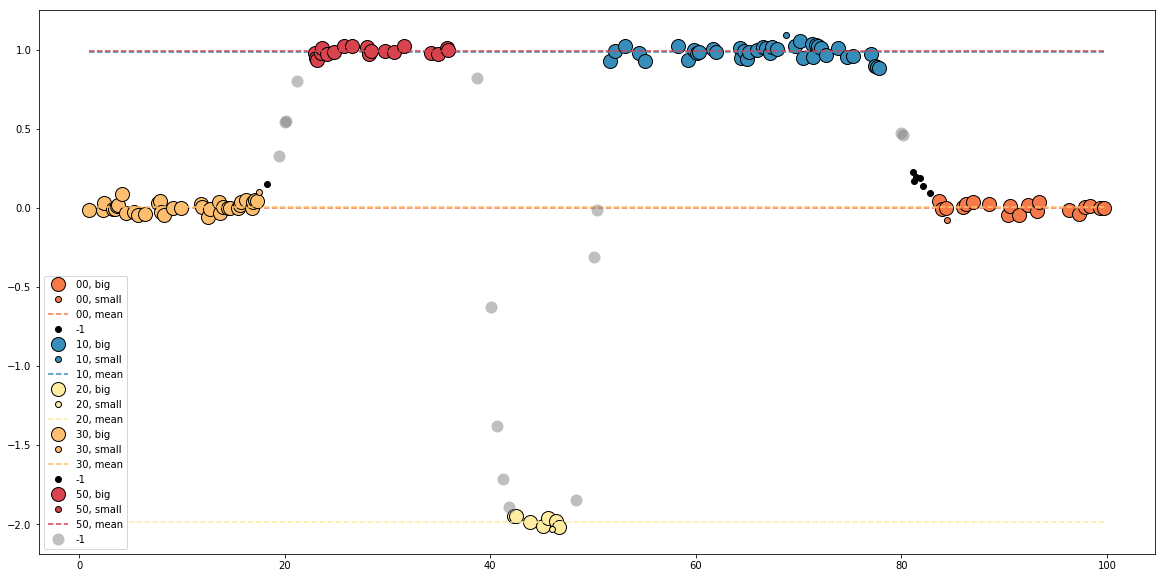

In [963]:
eps=0.05
min_samples = 5

coarse_unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 10)]
random.shuffle(colors)

fig, ax = plt.subplots(1,1, figsize=[20,10])

color_n = 0 
# iterate through the new labeled clusters
# redo dbscan for each cluster
# remove the outliers 
for coarse_label in coarse_unique_labels:

    if coarse_label == -1:
        
        coarse_cluster_mask = (labels == coarse_label)

        x = xxxx_[coarse_cluster_mask]
        y = yyyy_[coarse_cluster_mask]  

        ax.plot(x,y, 'o', markersize=12, 
                markerfacecolor='grey', markeredgecolor='grey', markeredgewidth=0,
                alpha=0.5, label='{}'.format(-1))
     
    else:
        # Mask the new events according the the updated labels
        coarse_cluster_mask = (labels == coarse_label)
        xx_coarse = xxxx_[coarse_cluster_mask]
        yy_coarse = yyyy_[coarse_cluster_mask]   
        coarse_std = np.std(yy_coarse)
        
        #print(xx_coarse.size, yy_coarse.size)
        
        # don't need to do this? or check this?
        #newnew_X = StandardScaler().fit_transform(yy_coarse)
        newnew_X = yy_coarse
        #print(newnew_X.size)    

        # Rerun DBScan with a smaller eps-param?
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(yy_coarse)
        fine_core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        fine_core_samples_mask[db.core_sample_indices_] = True
        fine_cluster_labels = db.labels_

        fine_n_clusters_ = len(set(fine_cluster_labels)) - (1 if -1 in fine_cluster_labels else 0)
        fine_n_noise_ = list(fine_cluster_labels).count(-1)

        metric_str = '\nFor coarse cluster=%d, coarse std = %f,\n\teps: %f, nr. clusters: %d, nr noise points: %d' \
            % (coarse_label, coarse_std, eps, fine_n_clusters_, fine_n_noise_)

        sil_sco = -1
        if np.unique(fine_cluster_labels).size>1:
            sil_sco = metrics.silhouette_score(yy_coarse, fine_cluster_labels)
            add_str = ", Silhouette Coefficient: %0.3f" % sil_sco
        else:
            add_str=''

        print(metric_str + add_str)

        fine_unique_labels = set(fine_cluster_labels)

        # Loop over the new refined clusters to exclude the noise
        # Black removed and is used for noise instead.
        col = colors[color_n]

        for fine_label in fine_unique_labels:

            if fine_label==-1:
                
                col = [0, 0, 0, 1]                
                fine_cluster_mask = (fine_cluster_labels == -1)
                x = xx_coarse[fine_cluster_mask]
                y = yy_coarse[fine_cluster_mask]  

                ax.plot(x,y, 'o', markerfacecolor=tuple(col),
                             markeredgecolor='k', markersize=6, label=f'{fine_label}')
                    
                fine_std = np.std(y)
                
            else:

                fine_cluster_mask = (fine_cluster_labels == fine_label)

                x = xx_coarse[fine_cluster_mask & fine_core_samples_mask]
                y = yy_coarse[fine_cluster_mask & fine_core_samples_mask]    

                ax.plot(x,y, 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=14, label='{}{}, big'.format(coarse_label, fine_label))

                x = xx_coarse[fine_cluster_mask & ~fine_core_samples_mask]
                y = yy_coarse[fine_cluster_mask & ~fine_core_samples_mask]  

                ax.plot(x,y, 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=6, label='{}{}, small'.format(coarse_label, fine_label))

                y_mean = yy_coarse[fine_cluster_mask].mean()
                ax.plot([new_xxxx[0],new_xxxx[-1]],[y_mean, y_mean], '--', color=tuple(col), label='{}{}, mean'.format(coarse_label, fine_label))    

                fine_std = np.std(yy_coarse[fine_cluster_mask])
        
            print(f"\tfine cluster={fine_label}, fine std = {fine_std}")
        
        color_n += 1
    plt.legend()